In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = "datasets/hyderabad_processed.csv"
data = pd.read_csv(dataset)
df_comp=pd.DataFrame(data)
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.5,19,48,47,6,630.0,11.5876,8.11132
1,2016-01-01 01:00:00,19.5,18,49,54,6,630.0,12.5983,8.81881
2,2016-01-01 02:00:00,19.5,18,50,60,6,630.0,9.4303,6.60121
3,2016-01-01 03:00:00,19.5,18,51,67,6,630.0,9.4768,6.63376
4,2016-01-01 04:00:00,19.5,19,48,87,6,630.0,9.5319,6.67233


In [3]:
df_comp['EnergyGenerated']=df_comp.EnergyGenerated
df_comp.head()

,date_time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,EnergyGenerated
0,2016-01-01 00:00:00,19.5,19,48,47,6,630.0,11.5876,8.11132
1,2016-01-01 01:00:00,19.5,18,49,54,6,630.0,12.5983,8.81881
2,2016-01-01 02:00:00,19.5,18,50,60,6,630.0,9.4303,6.60121
3,2016-01-01 03:00:00,19.5,18,51,67,6,630.0,9.4768,6.63376
4,2016-01-01 04:00:00,19.5,19,48,87,6,630.0,9.5319,6.67233


In [4]:
df_comp['date_time'] = pd.to_datetime(df_comp['date_time'])
df_comp2 = df_comp.groupby(df_comp['date_time'].dt.date).agg({ 'EnergyGenerated': 'sum'}).reset_index()
df_comp2.describe()

,EnergyGenerated
count,1462.000000
mean,329.294292
std,212.983380
min,7.432460
25%,170.336197
50%,273.779065
75%,449.538495
max,1553.609820


C:\Users\Sri Harsh\AppData\Local\Temp\ipykernel_3856\1877663863.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[threshold1 <= z_scores]


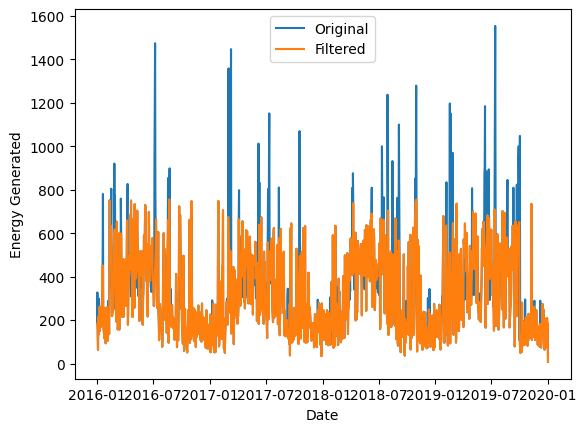

In [5]:
import matplotlib.pyplot as plt

plt.plot(df_comp2['date_time'], df_comp2['EnergyGenerated'], label='Original')

z_scores = np.abs((df_comp2['EnergyGenerated'] - df_comp2['EnergyGenerated'].mean()) / df_comp2['EnergyGenerated'].std())
threshold1 = 0.2
threshold2 = 2
df_filtered = df_comp2[z_scores <= threshold2]
df_filtered = df_filtered[threshold1 <= z_scores]

df_filtered['EnergyGenerated'] = df_filtered['EnergyGenerated'].fillna((df_filtered['EnergyGenerated'].shift(1) + df_filtered['EnergyGenerated'].shift(-1) + df_filtered['EnergyGenerated'].shift(-2) + df_filtered['EnergyGenerated'].shift(2)) / 4)


plt.plot(df_filtered['date_time'], df_filtered['EnergyGenerated'], label='Filtered')

plt.xlabel('Date')
plt.ylabel('Energy Generated')
plt.legend()


plt.show()


In [6]:
df_filtered['Temperature'] = df_comp['Temperature']
df_filtered['pressure'] = df_comp['Pressure']
df_filtered['humidity'] = df_comp['Humidity']
df_filtered['WindDirection(Degrees)'] = df_comp['WindDirection(Degrees)']
df_filtered['Speed'] = df_comp['Speed']
df_filtered['SunLightDuration'] = df_comp['SunLightDuration']
df_filtered['SolarRadiation'] = df_comp['SolarRadiation']

In [7]:
df_filtered.describe()

,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,298.149571,20.164468,15.133553,41.982688,200.990932,8.736191,658.586150,18.823884
std,179.856406,3.114686,2.472349,13.952082,114.354974,3.918895,20.205754,24.974560
min,7.432460,14.500000,9.000000,12.000000,0.000000,1.000000,630.000000,1.231900
25%,155.861860,18.000000,13.000000,32.000000,93.000000,6.000000,640.000000,3.254600
50%,232.870680,19.500000,15.000000,41.000000,239.000000,8.000000,656.000000,11.555800
75%,448.995540,22.500000,17.000000,50.000000,303.000000,11.000000,676.000000,18.776500
max,755.121990,28.000000,22.000000,97.000000,359.000000,26.000000,698.000000,173.827500


In [8]:
df_filtered.isnull().sum()

date_time                 0
EnergyGenerated           0
Temperature               0
pressure                  0
humidity                  0
WindDirection(Degrees)    0
Speed                     0
SunLightDuration          0
SolarRadiation            0
dtype: int64

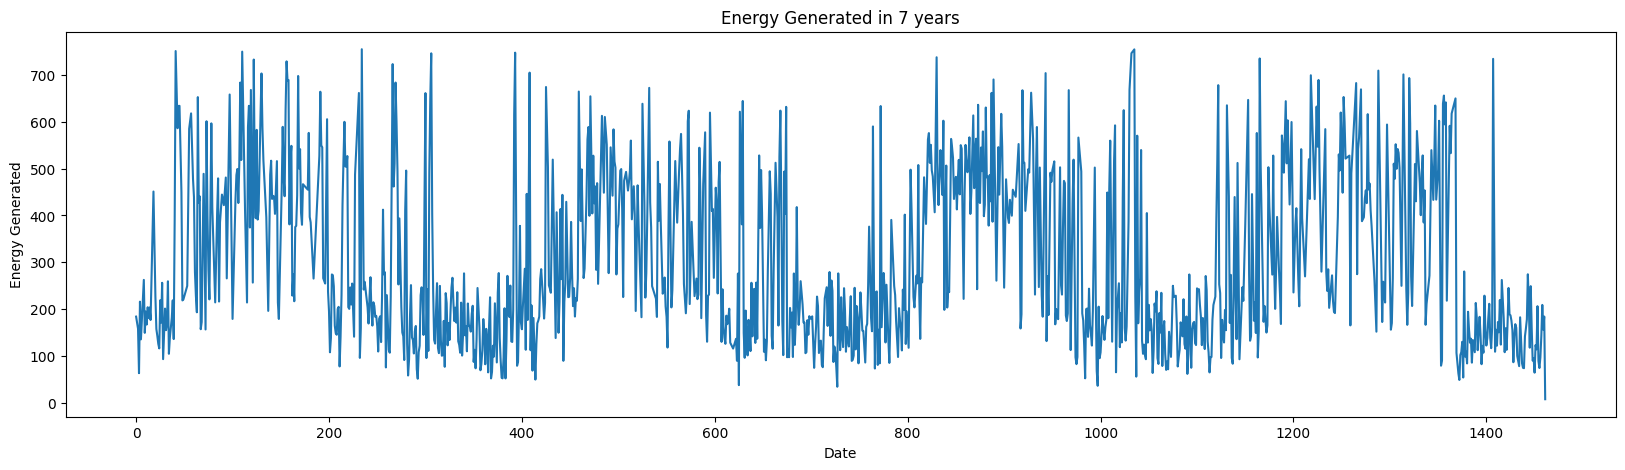

In [9]:
# Set the 'date' column as the index
df_filtered['date_time'] = pd.to_datetime(df_filtered['date_time'])


fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df_filtered['EnergyGenerated'].index, df_filtered['EnergyGenerated'])

ax.set_xlabel('Date')
ax.set_ylabel('Energy Generated')
ax.set_title('Energy Generated in 7 years')
plt.show()

In [10]:
import pandas as pd

# Extract month and day of the year from the 'datetime' column
df_filtered['month'] = df_filtered['date_time'].dt.month
df_filtered['day_of_year'] = df_filtered['date_time'].dt.dayofyear

summer_condition = ((df_filtered['month'] >= 6) & (df_filtered['month'] <= 8))
winter_condition = ((df_filtered['month'] >= 12) | (df_filtered['month'] <= 2))
rainy_condition = ((df_filtered['month'] >= 3) & (df_filtered['month'] <= 5))

# Create the 'isSummer', 'isWinter', and 'isRainy' columns
df_filtered['isSummer'] = summer_condition.astype(int)
df_filtered['isWinter'] = winter_condition.astype(int)
df_filtered['isRainy'] = rainy_condition.astype(int)


In [11]:
size = int(len(df_filtered)*0.8)
df_train, df_test = df_filtered.iloc[:size], df_filtered.iloc[size:]
df_test.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
1150,2019-02-24,379.94222,24.0,15,46,320,11,679.0,11.5568,2,55,0,1,0
1153,2019-02-27,646.79839,26.5,14,46,333,12,680.0,11.5558,2,58,0,1,0
1154,2019-02-28,273.42721,26.5,14,44,331,12,680.0,11.5557,2,59,0,1,0
1155,2019-03-01,132.43937,26.5,14,43,329,12,680.0,11.5557,3,60,0,0,1
1156,2019-03-02,142.48353,26.5,14,39,322,11,680.0,11.5568,3,61,0,0,1


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_filtered['EnergyGenerated'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.420768068918485
p-value: 0.0002726945693344221
Critical Values: {'1%': -3.435811119579282, '5%': -2.8639515467824075, '10%': -2.5680539506944444}


In [14]:
df_filtered.head()

,date_time,EnergyGenerated,Temperature,pressure,humidity,WindDirection(Degrees),Speed,SunLightDuration,SolarRadiation,month,day_of_year,isSummer,isWinter,isRainy
0,2016-01-01,183.91016,19.5,19,48,47,6,630.0,11.5876,1,1,0,1,0
2,2016-01-03,158.01996,19.5,18,50,60,6,630.0,9.4303,1,3,0,1,0
3,2016-01-04,63.10199,19.5,18,51,67,6,630.0,9.4768,1,4,0,1,0
4,2016-01-05,215.83562,19.5,19,48,87,6,630.0,9.5319,1,5,0,1,0
5,2016-01-06,135.34157,19.5,20,45,108,5,630.0,6.8733,1,6,0,1,0


## Using ARIMA model

In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(df_filtered["EnergyGenerated"],trace=True,suppress_warnings=True)
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=15517.627, Time=1.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16041.522, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15639.366, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15761.517, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17642.898, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=15498.167, Time=1.62 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=15701.041, Time=0.84 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15539.161, Time=0.99 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=15499.954, Time=1.51 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=15660.791, Time=0.56 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=15499.688, Time=0.89 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=15505.505, Time=0.47 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 10.734 seconds


In [16]:
from statsmodels.tsa.arima.model import ARIMA
model_Arima = ARIMA(df_train["EnergyGenerated"],order=(5,1,2))
model_Arima = model_Arima.fit()
model_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        EnergyGenerated   No. Observations:                  970
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -6176.589
Date:                Thu, 29 Jun 2023   AIC                          12369.178
Time:                        13:32:15   BIC                          12408.188
Sample:                             0   HQIC                         12384.027
                                - 970                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5193      0.654      0.794      0.427      -0.763       1.802
ar.L2         -0.0783      0.168     -0.465      0.642      -0.408       0.252
ar.L3          0.0158      0.037      0.425      0.671      -0.057       0.088
ar.L4         -0.0206      0.034     -0.610      0.542      -0.087       0.046
ar.L5          0.0520      0.034      1.530      0.126      -0.015       0.119
ma.L1         -1.1757      0.658     -1.788      0.074      -2.465       0.113
ma.L2          0.2352      0.596      0.395      0.693      -0.933       1.403
sigma2      2.011e+04    777.902     25.857      0.000    1.86e+04    2.16e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                89.60
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.63
Prob(H) (two-sided):                  0.56   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
start = len(df_train)
end =len(df_train)+len(df_test)-1
pred_arima = model_Arima.predict(start=start,end=end,type='levels')
pred_arima.index = df_filtered.index[start:end+1]
print(pred_arima)

1150    223.044973
1153    250.479926
1154    238.879670
1155    239.375195
1156    239.358309
           ...    
1457    240.480937
1458    240.480937
1459    240.480937
1460    240.480937
1461    240.480937
Name: predicted_mean, Length: 243, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_arima = sqrt(mean_squared_error(pred_arima,df_test["EnergyGenerated"]))/10
print(rmse_arima)


20.65497992776061



## Using Arima with Features

In [19]:
# Define the exogenous variables
exog_vars = ['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Arima2 = ARIMA(df_train['EnergyGenerated'], order=(1, 0, 2), exog=df_train[exog_vars])
model_fit = model_Arima2.fit()

pred_arima2 = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_arima2.index = df_filtered.index[start:end+1]

In [20]:
# Evaluate the forecast
rmse_arima2 = sqrt(mean_squared_error(pred_arima2,df_test["EnergyGenerated"]))/10

print("rmse_arima2:", rmse_arima2)
print("Forecasted energy generation:", pred_arima2)


rmse_arima2: 17.349236925277935
Forecasted energy generation: 1150    212.230883
1153    223.126722
1154    222.965428
1155    445.001319
1156    447.221122
           ...    
1457    218.750696
1458    216.862254
1459    216.917318
1460    216.247838
1461    215.359931
Name: predicted_mean, Length: 243, dtype: float64


## Using AutoRegression Model

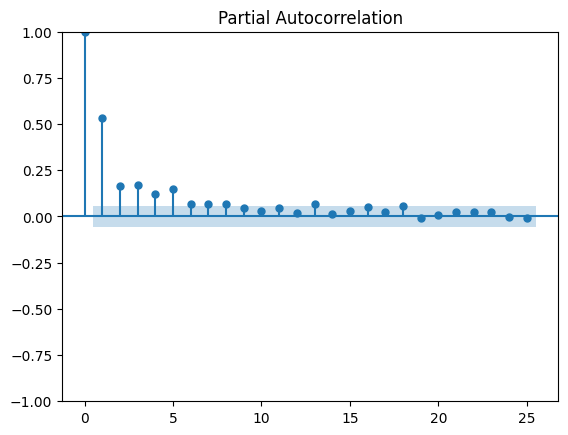

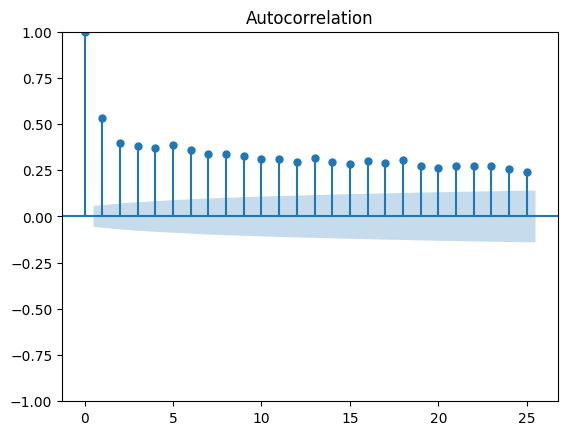

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pacf = plot_pacf(df_filtered['EnergyGenerated'],lags=25) 
acf = plot_acf(df_filtered['EnergyGenerated'],lags=25)

In [22]:
from statsmodels.tsa.ar_model import AutoReg
model_AutoReg = AutoReg(df_train['EnergyGenerated'],lags=24).fit()
print(model_AutoReg.summary())

                            AutoReg Model Results                             
Dep. Variable:        EnergyGenerated   No. Observations:                  970
Model:                    AutoReg(24)   Log Likelihood               -6030.193
Method:               Conditional MLE   S.D. of innovations            141.950
Date:                Thu, 29 Jun 2023   AIC                          12112.387
Time:                        13:32:19   BIC                          12238.545
Sample:                            24   HQIC                         12160.465
                                  970                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  38.6331     13.441      2.874      0.004      12.290      64.976
EnergyGenerated.L1      0.3398      0.032     10.458      0.000       0.276       0.403
EnergyGenerated.

In [23]:
pred_autoreg = model_AutoReg.predict(start=start,end=end,dynamic = False)
pred_autoreg.index = df_filtered.index[start:end+1]
print(pred_autoreg)

1150    229.419321
1153    271.602000
1154    263.007199
1155    276.420556
1156    254.701346
           ...    
1457    299.484903
1458    299.491462
1459    299.497885
1460    299.504175
1461    299.510335
Length: 243, dtype: float64


In [24]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_autoreg = sqrt(mean_squared_error(df_test['EnergyGenerated'],pred_autoreg))/10
print(rmse_autoreg)


19.694861396961766


## Using SARIMA

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the exogenous variables
exog_vars =['isSummer', 'isWinter', 'isRainy', 'Temperature', 'pressure', 'humidity', 'WindDirection(Degrees)', 'Speed', 'SunLightDuration']


model_Sarima = SARIMAX(df_train['EnergyGenerated'], order=(5, 1, 2), seasonal_order=(1, 0, 1, 12), exog=df_train[exog_vars])
model_fit = model_Sarima.fit()

In [26]:
# Forecast future energy generation
pred_sarima = model_fit.forecast(steps=len(df_test), exog=df_test[exog_vars])
pred_sarima.index = df_filtered.index[start:end+1]

rmse_sarima = sqrt(mean_squared_error(pred_sarima,df_test["EnergyGenerated"]))/10


print("rmse_arima2:", rmse_sarima)

print("Forecasted energy generation:", pred_sarima)


rmse_arima2: 21.036154869258375
Forecasted energy generation: 1150    213.602551
1153    279.021617
1154    266.858473
1155    411.924321
1156    420.740035
           ...    
1457     93.334015
1458     90.461035
1459     90.884153
1460     90.384106
1461     86.422008
Name: predicted_mean, Length: 243, dtype: float64


## Using Prophet Model

In [27]:

from prophet.plot import plot_plotly, plot_components_plotly
import prophet as pt


In [28]:
df_prophet = pd.DataFrame()
df_prophet ["ds"] = data["date_time"]
df_prophet["y"] = data["EnergyGenerated"]
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

df_prophet = df_prophet.groupby(df_prophet['ds'].dt.date).agg({ 'y': 'sum'}).reset_index()

df_prophet.head()

,ds,y
0,2016-01-01,183.91016
1,2016-01-02,327.11728
2,2016-01-03,158.01996
3,2016-01-04,63.10199
4,2016-01-05,215.83562


In [29]:
# Filter out the outliers
z_scores = np.abs((df_prophet['y'] - df_prophet['y'].mean()) / df_prophet['y'].std())

threshold1 = 0.2
threshold2 = 2

df_prophet_filtered = df_prophet[z_scores <= threshold2]
df_prophet_filtered = df_prophet_filtered[threshold1 <= z_scores]


df_prophet_filtered['y'] = df_prophet_filtered['y'].fillna((df_prophet_filtered['y'].shift(1) + df_prophet_filtered['y'].shift(-1) + df_prophet_filtered['y'].shift(-2) + df_prophet_filtered['y'].shift(2)) / 4)


In [30]:
size = int(len(df_prophet_filtered)*0.8)

df_prophet_train = df_prophet_filtered.iloc[:size]
df_prophet_test = df_prophet_filtered.iloc[size:]

In [31]:
model_prophet = pt.Prophet()
model_prophet.fit(df_prophet_train)
future = model_prophet.make_future_dataframe(periods=415) 
forecast = model_prophet.predict(future) 

13:32:27 - cmdstanpy - INFO - Chain [1] start processing
13:32:27 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1380,2020-04-08,320.975562,246.605459,621.030948,317.746456,324.363744,117.233892,117.233892,117.233892,5.405127,5.405127,5.405127,111.828766,111.828766,111.828766,0.0,0.0,0.0,438.209454
1381,2020-04-09,320.997923,276.471436,650.963404,317.757290,324.395927,145.572941,145.572941,145.572941,28.989790,28.989790,28.989790,116.583151,116.583151,116.583151,0.0,0.0,0.0,466.570864
1382,2020-04-10,321.020285,263.884818,614.673977,317.765390,324.428111,124.068735,124.068735,124.068735,2.660813,2.660813,2.660813,121.407923,121.407923,121.407923,0.0,0.0,0.0,445.089020
1383,2020-04-11,321.042647,253.917264,606.151198,317.777437,324.459155,110.456309,110.456309,110.456309,-15.840224,-15.840224,-15.840224,126.296533,126.296533,126.296533,0.0,0.0,0.0,431.498956
1384,2020-04-12,321.065008,279.892408,626.907760,317.788583,324.489794,125.532202,125.532202,125.532202,-5.701810,-5.701810,-5.701810,131.234012,131.234012,131.234012,0.0,0.0,0.0,446.597211


In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1380,2020-04-08,438.209454,246.605459,621.030948
1381,2020-04-09,466.570864,276.471436,650.963404
1382,2020-04-10,445.089020,263.884818,614.673977
1383,2020-04-11,431.498956,253.917264,606.151198
1384,2020-04-12,446.597211,279.892408,626.907760


In [34]:
df_prophet_test.tail()

,ds,y
1457,2019-12-28,143.18682
1458,2019-12-29,208.89050
1459,2019-12-30,156.12359
1460,2019-12-31,184.06458
1461,2020-01-01,7.43246


In [35]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-243:]['yhat']

rmse_prophet = rmse(predictions,df_prophet_test['y'])/10

print(rmse_prophet)

23.392063682874824


In [36]:
print("Root Mean Square error for Auto Regression :",rmse_autoreg)
print("Root Mean Square error for ARIMA :",rmse_arima)
print("Root Mean Square error for SARIMA :",rmse_sarima)
print("Root Mean Square error for ARIMA with features :",rmse_arima2)
print("Root Mean Square error for Prophet :",rmse_prophet)

Root Mean Square error for Auto Regression : 19.694861396961766
Root Mean Square error for ARIMA : 20.65497992776061
Root Mean Square error for SARIMA : 21.036154869258375
Root Mean Square error for ARIMA with features : 17.349236925277935
Root Mean Square error for Prophet : 23.392063682874824
